## Fundamentos das LLMs

### Questão 1: Explique os seguintes conceitos fundamentais dos LLMs, fornecendo exemplos práticos e diagramas onde for relevante:

#### Pre-training

O pre-training é a fase inicial de treinamento de um Large Language Model (LLM), onde ele aprende padrões gerais da linguagem a partir de grandes volumes de texto (como livros, artigos, páginas da web).

- Objetivo: aprender uma representação geral da linguagem sem supervisão direta.

- Exemplo de tarefa: Masked Language Modeling (como no BERT) ou Next Token Prediction (como no GPT).



In [40]:
'''
Frase de treino: "O gato subiu no ____." 

O modelo tenta prever: "telhado"

'''

'\nFrase de treino: "O gato subiu no ____." \n\nO modelo tenta prever: "telhado"\n\n'

>[!NOTE]
>
> _O modelo aprende a prever palavras, sentenças ou relações linguísticas sem saber a tarefa final._
>
>



#### Transfer Learning

Transfer Learning significa aproveitar o que o modelo aprendeu durante o pre-training e reutilizá-lo em novas tarefas com menos dados.

- Exemplo prático:

     - Um LLM treinado em bilhões de palavras pode ser ajustado com poucos exemplos para responder perguntas sobre contratos jurídicos.

<br>

>[!NOTE]
>
> _Você não precisa treinar um LLM do zero para cada tarefa. Em vez disso, "transfere" o conhecimento geral aprendido para tarefas específicas._

#### Embeddings

Embeddings são representações vetoriais (numéricas) de palavras, frases ou documentos em um espaço contínuo de alta dimensão.

- Palavras com significados semelhantes ficam próximas no espaço vetorial.


In [41]:
'''

"gato" ≈ [0.21, -0.12, ..., 0.87]
"cachorro" ≈ [0.19, -0.10, ..., 0.84]

'''

'\n\n"gato" ≈ [0.21, -0.12, ..., 0.87]\n"cachorro" ≈ [0.19, -0.10, ..., 0.84]\n\n'

>[!NOTE]
>
> _Aplicação prática: busca semântica, recomendação, clustering de documentos._

#### Transformers

Transformers são a arquitetura base dos LLMs modernos. Introduzidos em 2017 no artigo "Attention is All You Need".

- São redes neurais que processam dados em paralelo e capturam relacionamentos entre palavras, independentemente da distância entre elas no texto.

#####  _Componentes principais:_

1. Input Embedding

2. Positional Encoding

3. Self-Attention

4. Feedforward Layer

5. Residual Connections + Layer Norm

#### Attention

O Attention (atenção) é um mecanismo que permite ao modelo focar nas partes mais relevantes do texto ao fazer previsões.

- Permite que o modelo atribua pesos diferentes para palavras de entrada.

- Exemplo: na frase "O gato que estava no telhado miou", para prever "miou", o modelo dá mais peso a "gato".


In [42]:
''' 

Atenção:
"miou" ← "gato" (peso: 0.9)
       ← "telhado" (peso: 0.3)


'''

' \n\nAtenção:\n"miou" ← "gato" (peso: 0.9)\n       ← "telhado" (peso: 0.3)\n\n\n'

>[!NOTE]
>
> _Existem variantes:_
>
> - Self-Attention (entre palavras de uma mesma frase)
>
> - Cross-Attention (entre frases de diferentes fontes)

#### Fine-Tuning

Fine-Tuning é o ajuste final de um LLM para tarefas específicas usando conjuntos de dados menores e rotulados.

- Reutiliza o conhecimento aprendido no pre-training

- Atualiza os pesos do modelo com novos dados específicos da tarefa

##### _Exemplo prático:_

- Um modelo GPT pré-treinado pode ser fine-tuned para responder perguntas médicas com um dataset de prontuários.

In [43]:
''' 
Input: "Paciente com dor torácica e histórico de hipertensão. O que considerar?"
Output: "Investigar angina, infarto agudo do miocárdio..."

'''

' \nInput: "Paciente com dor torácica e histórico de hipertensão. O que considerar?"\nOutput: "Investigar angina, infarto agudo do miocárdio..."\n\n'

## Quizzes do Curso de NLP da Hugging Face

### Questão 2: Acesse os quizzes dos capítulos 1, 2 e 3 do curso de NLP da Hugging Face através do link: Curso de NLP.

1. Resolva os quizzes e capture screenshots dos resultados.
2. Anexe as screenshots a esta avaliação e explique brevemente os conceitos abordados em cada quiz.

link: https://huggingface.co/learn/llm-course/chapter1/1?fw=pt

In [44]:
from PIL import Image
from IPython.display import display, HTML
import base64
from io import BytesIO

In [45]:
# Lista das imagens
caminhos = [
    "capitulo_1.png",
    "capitulo_2.png",
    "capitulo_3.png",
    "certificado_hugging.webp"
]

In [46]:
# Tamanho da imagem
largura, altura = 300, 200

In [47]:
# Função para converter imagem PIL para tag HTML embutida
def pil_para_html(imagem):
    buffer = BytesIO()
    imagem.save(buffer, format="PNG")
    img_b64 = base64.b64encode(buffer.getvalue()).decode()
    return f'<img src="data:image/png;base64,{img_b64}" width="{largura}" height="{altura}" style="margin-right:10px;" />'


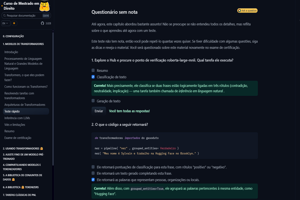
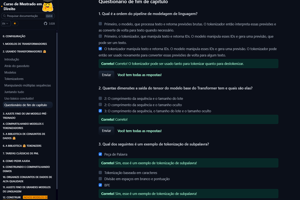
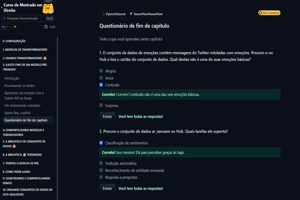
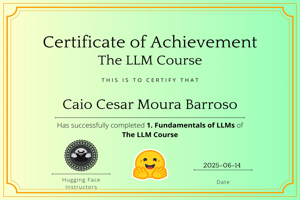

In [48]:

# Gerar HTML para  as imagens
html_imagens = ""
for caminho in caminhos:
    img = Image.open(caminho).resize((largura, altura))
    html_imagens += pil_para_html(img)

# Exibir
display(HTML(f"<div style='display:flex;'>{html_imagens}</div>"))


## Análise de Dados com NER

### Questão 3: Baixe o conjunto de dados de notícias disponível em:Folha UOL News Dataset.

1. Utilize o modelo 'monilouise/ner_pt_br' para identificar e extrair entidades mencionadas nas notícias.
2. Crie um ranking das organizações que mais apareceram na seção "Mercado" no primeiro trimestre de 2015.
3. Apresente os resultados em um relatório detalhado, incluindo a metodologia utilizada e visualizações para apoiar a análise.

link: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol

[Bloco 1] - Configurações e Instalações

In [49]:
# !pip install kagglehub
# !pip install spacy
# !python -m spacy download pt_core_news_lg
# !pip install nltk wordcloud matplotlib seaborn scikit-learn tqdm

[Bloco 2] - Importações e Explicações

In [50]:
# 📦 Utilitários de sistema e warnings
import os                            # manipulação de arquivos e diretórios
import sys                           # controle de saída/entrada e paths
import warnings                      # silenciar/exibir avisos

# 📄 Manipulação de dados
import pandas as pd                  # estrutura principal para DataFrames
import numpy as np  # suporte a arrays, matrizes e operações numéricas (base para TF-IDF, LDA, etc.)
import string
import random
import re


# 📊 Pré-processamento de texto
import nltk                          # toolkit de linguagem natural
from nltk.tokenize import word_tokenize   # tokenização
from nltk.stem import RSLPStemmer         # stemmer para português
from nltk.corpus import stopwords as nltk_stopwords  # stopwords do NLTK

from sklearn.decomposition import LatentDirichletAllocation



import spacy                         # NLP com modelo em português
from spacy.lang.pt.stop_words import STOP_WORDS as spacy_stopwords  # stopwords do spaCy

# 🔢 Tipagem e listas
from typing import List, Set, Any    # anotação de tipos

# ⏳ Progresso
from tqdm import tqdm                # barras de progresso (em loops e .progress_map)

# 📈 TF-IDF e LDA
from sklearn.feature_extraction.text import TfidfVectorizer         # vetorização de texto
from sklearn.decomposition import LatentDirichletAllocation as LDA # extração de tópicos

# 🧮 Utilitários de contagem e agrupamento
from collections import Counter      # contagem de elementos
from itertools import chain          # achatamento de listas de listas

# 🌐 KaggleHub (opcional)
import kagglehub                     # carregar datasets diretamente do Kaggle

# 🌄 Visualizações
from wordcloud import WordCloud      # nuvem de palavras
import matplotlib.pyplot as plt      # gráficos padrão
from matplotlib.axes import Axes     # anotação de tipo para funções com subplot
import seaborn as sns                # visualização com estilo aprimorado

[Bloco 3] - Configuração global e semente

In [51]:
warnings.filterwarnings('ignore')
SEED = 123
random.seed(SEED)
np.random.seed(SEED)


print(f'Numpy version: {np.__version__}')
print(f'spaCy version: {spacy.__version__}')

Numpy version: 2.2.5
spaCy version: 3.8.5


[Bloco 4] - Download dos dados do Kaggle

In [52]:
# Download latest version

path = kagglehub.dataset_download("marlesson/news-of-the-site-folhauol")
print("Path to dataset files:", path)
print("Arquivos encontrados:", os.listdir(path))

Path to dataset files: C:\Users\barro\.cache\kagglehub\datasets\marlesson\news-of-the-site-folhauol\versions\2
Arquivos encontrados: ['articles.csv']


[Bloco 5] - Leitura e pré-processamento básico

In [53]:
df = pd.read_csv(os.path.join(path, "articles.csv"))

display(df.head(5))


,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


[Bloco 6] - Filtrar notícias da seção "Mercado" no 1º trimestre de 2015

In [54]:
# Garante que a coluna de data está em formato datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Filtrar para seção "Mercado" e datas entre jan e mar de 2015
df_mercado_2015q1 = df[
    (df["category"] == "mercado") &
    (df["date"].dt.year == 2015) &
    (df["date"].dt.month <= 3)
].copy()

print(f"Total de notícias na seção 'Mercado' no 1º trimestre de 2015: {len(df_mercado_2015q1)}")


Total de notícias na seção 'Mercado' no 1º trimestre de 2015: 2111


[Bloco 7] - Aplicar NER com o modelo monilouise/ner_pt_br

In [55]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from collections import Counter
from tqdm.notebook import tqdm
import pandas as pd
import re

In [56]:
# Ativa a barra de progresso
tqdm.pandas()

In [57]:
# Carrega o modelo NER
model_name = "monilouise/ner_pt_br"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [58]:
# Listas de filtragem
palavras_indesejadas = {
    "dilma", "rousseff", "paulo", "são", "sul", "lula", "le", "rece", "jato",
    "unidos", "estados", "federal", "governo", "ministério", "congresso",
    "folha", "folha folha", "sete", "as", "fi", "letras", "br", "ib", "times",  "tch","par", "co", "financial","bs", "fg","sp", "reut ers", "vargas", "cs", "re ers"
}

regioes_paises = {
    "brasil", "china", "eua", "grécia", "alemanha", "argentina", "frança",
    "sul", "norte", "centro", "leste", "oeste"
}

correcoes_especificas = {
    "blo omberg": "bloomberg",
    "volks wa gen": "volkswagen",
    "hs bc": "hsbc",
    "fi tch": "fitch",
    "folha invest": "folhainvest",
    "fbovespa": "b3",
    "bw offshore": "bw offshore",
    "itaú unibanco": "itaú unibanco",
    "brad esco": "bradesco",
    "eas ynvest": "easynvest",
    "santa nder": "santander",
    "bras kem": "braskem"
}



In [59]:
def palavra_valida(p):
    return re.fullmatch(r"[A-Za-zÀ-ÖØ-öø-ÿ]{2,}", p) is not None

def extrair_organizacoes(texto):
    try:
        ents = ner_pipeline(texto)
        composicao = []
        entidade_atual = []

        for ent in ents:
            if ent["entity_group"] != "ORG":
                if entidade_atual:
                    composicao.append(" ".join(entidade_atual))
                    entidade_atual = []
                continue

            palavra = ent["word"].replace("##", "")
            if not palavra_valida(palavra):
                continue

            palavra_lower = palavra.lower()
            if palavra_lower in palavras_indesejadas or palavra_lower in regioes_paises:
                continue
            if palavra_lower in {"o", "a", "do", "da", "dos", "das", "de", "em"}:
                continue

            entidade_atual.append(palavra)

        if entidade_atual:
            composicao.append(" ".join(entidade_atual))

        return composicao
    except:
        return []

def normalizar_entidade(entidade):
    entidade = entidade.lower().strip()
    entidade = re.sub(r"\s+", " ", entidade)
    entidade = correcoes_especificas.get(entidade, entidade)
    if entidade in palavras_indesejadas or len(entidade) < 2:
        return None
    return entidade.title()




In [60]:
# Aplica o NER com barra de progresso
df_mercado_2015q1["entidades"] = (
    df_mercado_2015q1["title"].fillna("") + ". " + df_mercado_2015q1["text"].fillna("")
).progress_apply(extrair_organizacoes)



  0%|          | 0/2111 [00:00<?, ?it/s]

[Bloco 8] - Criar ranking de organizações mais mencionadas

In [61]:
# Junta e normaliza todas as entidades
todas_orgs_normalizadas = [
    normalizar_entidade(ent) for lista in df_mercado_2015q1["entidades"] for ent in lista
]
todas_orgs_filtradas = [org for org in todas_orgs_normalizadas if org]

# Cria ranking final
ranking_orgs = Counter(todas_orgs_filtradas).most_common(20)
df_ranking = pd.DataFrame(ranking_orgs, columns=["Organizacao", "Frequencia"])

# Visualiza o ranking
display(df_ranking)


,Organizacao,Frequencia
0,Bc,37
1,Bloomberg,36
2,B3,25
3,Invest,20
4,Google,17
5,Bw Offshore,16
6,Volkswagen,14
7,Vale,14
8,Bovespa,13
9,Hsbc,13


[Bloco 9] - Visualização com gráfico de barras

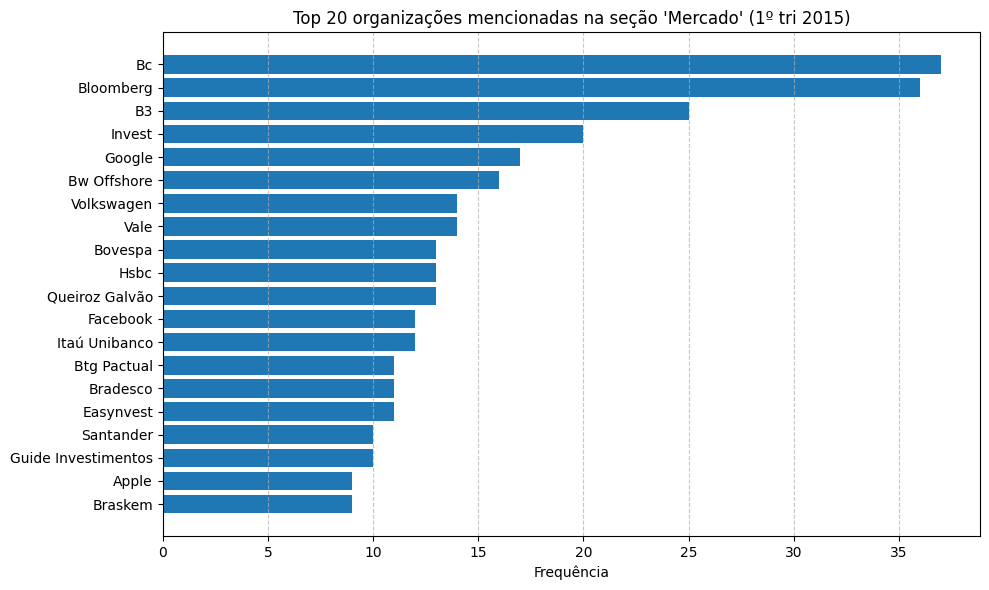

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_ranking["Organizacao"], df_ranking["Frequencia"])
plt.title("Top 20 organizações mencionadas na seção 'Mercado' (1º tri 2015)")
plt.xlabel("Frequência")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[Bloco 10] - Nuvem de Palavra

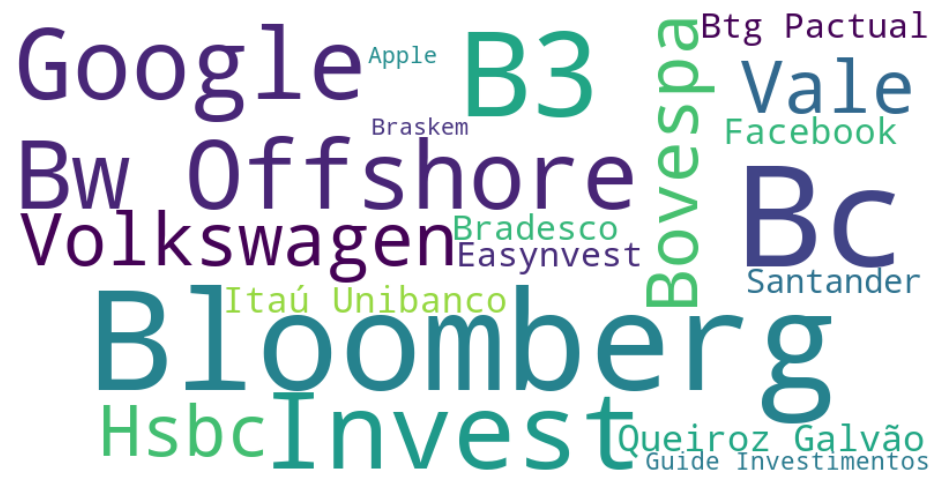

In [63]:
# Converte o DataFrame em dicionário: {organização: frequência}
frequencias = dict(zip(df_ranking["Organizacao"], df_ranking["Frequencia"]))

# Gera a nuvem de palavras a partir das frequências
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(frequencias)

# Exibe a nuvem
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Relatório: Entidades extraídas da seção "Mercado" (1º trimestre de 2015)

**Objetivo**  
Extrair e analisar as organizações mais mencionadas nas notícias da seção *Mercado* no 1º trimestre de 2015, com base no dataset "Folha UOL News Dataset".

**Metodologia**  
1. Filtramos as notícias publicadas entre 01/01/2015 e 31/03/2015 com a seção marcada como "Mercado".
2. Aplicamos um modelo pré-treinado de NER (`monilouise/ner_pt_br`) para identificar entidades do tipo `ORG` (organizações).
3. Contabilizamos a frequência de cada organização identificada.
4. Visualizamos os 20 principais resultados em um gráfico de barras.

**Ferramentas**
- Hugging Face Transformers
- pandas e matplotlib
- Modelo NER: `monilouise/ner_pt_br`

**Resultados**
O gráfico acima mostra o ranking das 20 organizações mais mencionadas nas notícias da seção *Mercado* no período selecionado.

**Limitações**
- O modelo NER pode não reconhecer todas as entidades corretamente.
- Alguns textos estavam ausentes ou incompletos.



## Engenharia de Prompts

### Questão 4: Analise os seguintes prompts e identifique por que eles poderiam gerar respostas insatisfatórias ou irrelevantes:

- Exemplo 1: "Escreva sobre cachorros."
- Exemplo 2: "Explique física."

#### _Subquestões:_

1. Reformule cada prompt utilizando técnicas de engenharia de prompts para torná-los mais específicos e direcionados.
2. Explique as melhorias feitas em cada caso e os motivos por trás das reformulações.

Os exemplos foram vagos e sem contexto.

##### Prompt Reformulado

1. “Escreva um texto de até 100 palavras explicando por que os cães são considerados os melhores amigos do ser humano, incluindo pelo menos três características comportamentais. Use uma linguagem simples e acessível para estudantes do ensino médio.”

2. “Explique, de forma simplificada e com exemplos práticos, como funciona a Lei da Inércia de Newton. Imagine que você está explicando para um estudante do ensino fundamental.”

##### Melhorias aplicadas

Foi colocado no prompt Especificidade, Limite de Escopo, Formato, Público-Alvo, e Tom. Prompts vagos tendem a gerar saídas genéricas. Ao aplicar técnicas como especificidade, delimitação de escopo, definição de formato e público, aumentamos drasticamente a qualidade da resposta.

### Questão 5: O prompt "Descreva a história da internet." foi mal formulado.

Aplique técnicas de engenharia de prompts para melhorá-lo. Reformule o prompt para melhorar a especificidade e a qualidade da resposta. Justifique as mudanças feitas e explique como elas contribuem para obter uma resposta mais eficaz e relevante.

##### Prompt Reformulado

“Crie um resumo com até 300 palavras explicando a evolução da internet desde os anos 1960 até os dias atuais, destacando marcos como ARPANET, o surgimento da Web, o crescimento das redes sociais e a era da computação em nuvem. Use linguagem acessível para estudantes do ensino médio.”

##### _Justificativa das melhorias aplicadas_

| Técnica aplicada            | Como foi aplicada                                                          | Benefício                             |
| --------------------------- | -------------------------------------------------------------------------- | ------------------------------------- |
| **Especificidade temática** | Foco nos marcos históricos principais (ARPANET, Web, redes sociais, nuvem) | Garante profundidade nos pontos-chave |
| **Limitação de escopo**     | Recorte temporal: 1960 até hoje                                            | Evita que a resposta divague          |
| **Público-alvo**            | Estudantes do ensino médio                                                 | Adapta o nível de linguagem           |
| **Formato da resposta**     | Resumo de até 300 palavras                                                 | Define extensão e estilo              |
| **Tom da linguagem**        | Simples e acessível                                                        | Melhora a compreensão                 |


### Questão 6: Aplique a técnica de Chain of Thought (CoT) para melhorar o prompt "Explique como funciona a energia solar."

Detalhando o raciocínio necessário para que o modelo forneça uma resposta completa e coerente. Explique como a aplicação da técnica CoT melhora a resposta do modelo.

##### Prompt Reformulado

“Explique como funciona a energia solar seguindo um raciocínio passo a passo. Comece descrevendo o que é a energia solar, depois explique os dois principais tipos de tecnologia (fotovoltaica e térmica), como os painéis captam a energia, como ela é convertida em eletricidade, como pode ser armazenada e distribuída, e finalize com as principais vantagens e desafios dessa fonte de energia.”

##### _Justificativa da melhoria com Chain of Thought (CoT)_

| Etapa                         | O que adiciona             | Benefício                        |
| ----------------------------- | -------------------------- | -------------------------------- |
| 1️⃣ Definir o conceito        | “O que é energia solar?”   | Dá base à explicação             |
| 2️⃣ Classificar os tipos      | Fotovoltaica vs térmica    | Torna a explicação mais completa |
| 3️⃣ Descrever o funcionamento | Captação → conversão → uso | Mostra a lógica do processo      |
| 4️⃣ Tratar o armazenamento    | Baterias, rede elétrica    | Aborda aspectos reais            |
| 5️⃣ Apontar prós e contras    | Sustentabilidade, custo    | Enriquece com visão crítica      |


##### Vantagens da técnica CoT

-  Estrutura a resposta com começo, meio e fim

- Gera conteúdo mais abrangente e didático

- Reduz omissões e incoerências

- Ajuda o modelo a seguir um fluxo lógico claro

## Projeto Prático com Streamlit, LLM e LangChain

### Questão 7: Escolha uma aplicação para desenvolver utilizando Streamlit, LLM e LangChain. Crie um aplicativo interativo que demonstre o uso de LLMs para resolver um problema específico.

#### _Exemplos de Aplicação:_

1. Sumarizador de Artigos:
    - Desenvolva um aplicativo que permita ao usuário inserir o texto de um artigo e obter um resumo conciso do conteúdo.


2. Sistema de Perguntas e Respostas:
    - Crie um sistema que permita ao usuário fazer perguntas sobre um tópico específico e receba respostas precisas e relevantes.

3. Agente de Viagem:
    - Desenvolva um agente virtual que possa ajudar usuários a planejar suas viagens, fornecendo informações sobre destinos, itinerários, e dicas de viagem.

4. App de Auxílio em Aprendizagem:
    - Crie um aplicativo que auxilie estudantes a aprender um novo assunto, fornecendo explicações, exemplos e quizzes interativos.


#### _Subquestões:_

1. Descreva a aplicação escolhida e os objetivos principais do projeto.
2. Explique a arquitetura do aplicativo, incluindo como o Streamlit, LLM e LangChain são utilizados.
3. Implemente o aplicativo e forneça o código-fonte, junto com instruções para execução.
4. Apresente evidências e exemplos de uso do aplicativo e discuta os resultados obtidos.

#### Arquivo agente.py

In [ ]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_community.vectorstores import FAISS
from langchain.docstore.document import Document
from langchain_huggingface import HuggingFaceEmbeddings

import os, yaml, fitz


# ================================
# Configuração
# ================================

CONFIG_FILE = "config.yaml"
with open(CONFIG_FILE, "r") as file:
    config = yaml.safe_load(file)

os.environ["GROQ_API_KEY"] = config["api_key"]["key"]

modelo_llm = ChatGroq(
    model=config["model"]["name"],  
    temperature=config["model"].get("temperature", 0.7),
    groq_api_key=config["api_key"]["key"]
)

print(f"✅ Usando modelo: {config['model']['name']}")



modelo_embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")



# ======================
# CARREGAR PDFs
# ======================
def carregar_documentos_pdf(pasta="data"):
    documentos = []
    if not os.path.exists(pasta):
        raise FileNotFoundError(f"Pasta '{pasta}' não encontrada.")
    
    for nome_arquivo in os.listdir(pasta):
        if nome_arquivo.lower().endswith(".pdf"):
            caminho = os.path.join(pasta, nome_arquivo)
            try:
                doc_pdf = fitz.open(caminho)
                conteudo = "".join([pagina.get_text() for pagina in doc_pdf])
                if conteudo.strip():
                    documentos.append(Document(
                        page_content=conteudo,
                        metadata={"fonte": nome_arquivo}
                    ))
                    print(f"📄 Documento carregado: {nome_arquivo}")
                else:
                    print(f"⚠️ Documento vazio: {nome_arquivo}")
            except Exception as e:
                print(f"❌ Erro ao ler '{nome_arquivo}': {e}")
    
    return documentos

documentos = carregar_documentos_pdf()

if not documentos:
    raise ValueError("❌ Nenhum documento carregado. Verifique a pasta 'data/'.")


# ======================
# CRIAR BASE VETORIAL
# ======================

print("🔍 Gerando embeddings e base vetorial...")
base_vetorial = FAISS.from_documents(documentos, modelo_embedding)

# ======================
# PROMPT
# ======================

template_prompt = """
Você é um assistente médico. Use o seguinte contexto extraído da base para responder:

{melhores_praticas}

Histórico da Conversa:
{historico}

Pergunta Atual: {mensagem}
"""

prompt = PromptTemplate(
    input_variables=['mensagem', 'melhores_praticas', 'historico'],
    template=template_prompt
)

cadeia = LLMChain(llm=modelo_llm, prompt=prompt)

# ======================
# FUNÇÃO PRINCIPAL
# ======================

def gerar_resposta(mensagem, conversa_historico):
    """
    Gera resposta com base no histórico e na base vetorial.
    
    Parâmetros:
    - mensagem: str -> pergunta atual.
    - conversa_historico: list[str] -> histórico da conversa.

    Retorna:
    - resposta: str
    """
    try:
        docs = base_vetorial.similarity_search(mensagem, k=10)
        melhores_praticas = [f"[Fonte: {d.metadata.get('fonte', 'desconhecida')}]\n{d.page_content[:1000]}" for d in docs]

        historico_formatado = "\n".join(conversa_historico)

        resposta = cadeia.run(
            mensagem=mensagem,
            melhores_praticas="\n\n".join(melhores_praticas),
            historico=historico_formatado
        )

        return resposta
    
    except Exception as e:
        return f"Erro ao gerar resposta: {str(e)}"


#### Arquivo app.py

In [ ]:
import streamlit as st
import pandas as pd
import json
from PyPDF2 import PdfReader
from langchain.docstore.document import Document
from agente import gerar_resposta, base_vetorial

# ===============================
# Inicializar sessão
# ===============================
if "chat_historico" not in st.session_state:
    st.session_state["chat_historico"] = []

if "pergunta_exemplo" not in st.session_state:
    st.session_state["pergunta_exemplo"] = None

# ===============================
# Funções auxiliares
# ===============================
def carregar_texto_pdf(uploaded_pdf):
    reader = PdfReader(uploaded_pdf)
    texto = ""
    for page in reader.pages:
        texto += page.extract_text() or ""
    return texto

def carregar_texto_csv(uploaded_csv):
    df = pd.read_csv(uploaded_csv)
    return df.to_string()

def carregar_texto_excel(uploaded_excel):
    df = pd.read_excel(uploaded_excel)
    return df.to_string()

def exportar_historico_txt(historico):
    return "\n".join(f"{role.upper()}: {msg}" for role, msg in historico)

def exportar_historico_json(historico):
    return json.dumps(historico, indent=2, ensure_ascii=False)

def exibir_conversa():
    for role, msg in st.session_state["chat_historico"]:
        with st.chat_message(role):
            st.markdown(msg)

# ===============================
# Sidebar – Upload, Exemplos e Exportação
# ===============================
st.sidebar.title("🩺 Dr. Chicó – Assistente Médico")

st.sidebar.markdown("""
Converse com o **Dr. Chicó**, assistente de IA especializado em anestesiologia.

💬 Temas sugeridos:
- Técnicas anestésicas
- Reações fisiológicas
- Riscos e complicações
- Casos clínicos
""")

# Categorias de perguntas
with st.sidebar.expander("💡 Conceitos Básicos", expanded=False):
    st.markdown("Exemplos sobre conceitos fundamentais de anestesia.")
    if st.button("O que é anestesia geral?"):
        st.session_state["pergunta_exemplo"] = "O que é anestesia geral e como ela funciona?"
    if st.button("Tipos de anestesia"):
        st.session_state["pergunta_exemplo"] = "Qual a diferença entre anestesia geral, regional e local?"

with st.sidebar.expander("⚠️ Complicações", expanded=False):
    st.markdown("Questões sobre riscos e efeitos adversos.")
    if st.button("Complicações comuns"):
        st.session_state["pergunta_exemplo"] = "Quais são as complicações mais comuns na anestesia?"

with st.sidebar.expander("📎 Fontes e Estudo", expanded=False):
    st.markdown("Entenda de onde vem o conhecimento do assistente.")
    if st.button("Fontes de dados"):
        st.session_state["pergunta_exemplo"] = "Quais as fontes de dados que utiliza para responder?"

# Upload de arquivo
st.sidebar.markdown("### 📎 Adicionar Documento")
TIPOS_SUPORTADOS = {
    "application/pdf": carregar_texto_pdf,
    "text/csv": carregar_texto_csv,
    "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet": carregar_texto_excel,
    "application/vnd.ms-excel": carregar_texto_excel,
}
uploaded_file = st.sidebar.file_uploader("Envie um arquivo (PDF, CSV, Excel)", type=["pdf", "csv", "xlsx"])
if uploaded_file:
    try:
        if uploaded_file.type in TIPOS_SUPORTADOS:
            texto = TIPOS_SUPORTADOS[uploaded_file.type](uploaded_file)
            if texto.strip():
                base_vetorial.add_documents([Document(page_content=texto)])
                st.sidebar.success("✅ Documento adicionado à base de conhecimento.")
            else:
                st.sidebar.warning("⚠️ O arquivo não contém texto reconhecível.")
        else:
            st.sidebar.error("❌ Formato de arquivo não suportado.")
    except Exception as e:
        st.sidebar.error(f"Erro ao processar o arquivo: {e}")

# Exportação do histórico
with st.sidebar.expander("📤 Exportar Histórico"):
    if st.button("⬇️ Exportar como .txt"):
        txt = exportar_historico_txt(st.session_state["chat_historico"])
        st.download_button("Baixar .txt", txt, file_name="chat_irineu.txt")
    if st.button("⬇️ Exportar como .json"):
        js = exportar_historico_json(st.session_state["chat_historico"])
        st.download_button("Baixar .json", js, file_name="chat_irineu.json")

# ===============================
# Título principal
# ===============================
st.title("👨‍⚕️ Dr. Chicó - O Assistente Médico Inteligente")
st.markdown("Converse com o assistente de IA sobre **temas médicos confiáveis**, com base em documentos técnicos.")

# ===============================
# Botão de nova conversa
# ===============================
if st.button("🔄 Nova Conversa"):
    st.session_state["chat_historico"] = []
    st.session_state["pergunta_exemplo"] = None
    st.success("✅ Nova conversa iniciada.")

# ===============================
# Entrada do usuário
# ===============================
entrada_usuario = st.chat_input("Digite sua pergunta médica aqui...")
pergunta = entrada_usuario or st.session_state["pergunta_exemplo"]

# ===============================
# Processa nova pergunta
# ===============================
if pergunta and (
    len(st.session_state["chat_historico"]) == 0 or
    st.session_state["chat_historico"][-1] != ("user", pergunta)
):
    st.session_state["chat_historico"].append(("user", pergunta))
    historico_formatado = [
        f"{'Usuário' if role == 'user' else 'Assistente'}: {msg}"
        for role, msg in st.session_state["chat_historico"]
    ]
    try:
        resposta = gerar_resposta(pergunta, historico_formatado)
        st.session_state["chat_historico"].append(("assistant", resposta))
    except Exception as e:
        st.session_state["chat_historico"].append(("assistant", f"Erro ao gerar resposta: {e}"))
    st.session_state["pergunta_exemplo"] = None

# ===============================
# Renderiza o histórico do chat
# ===============================
exibir_conversa()


#### Como Rodar o Projeto

- Foi usado como o API o groq: site: https://console.groq.com/home
    - _Uma API gratuita e facil de usar_

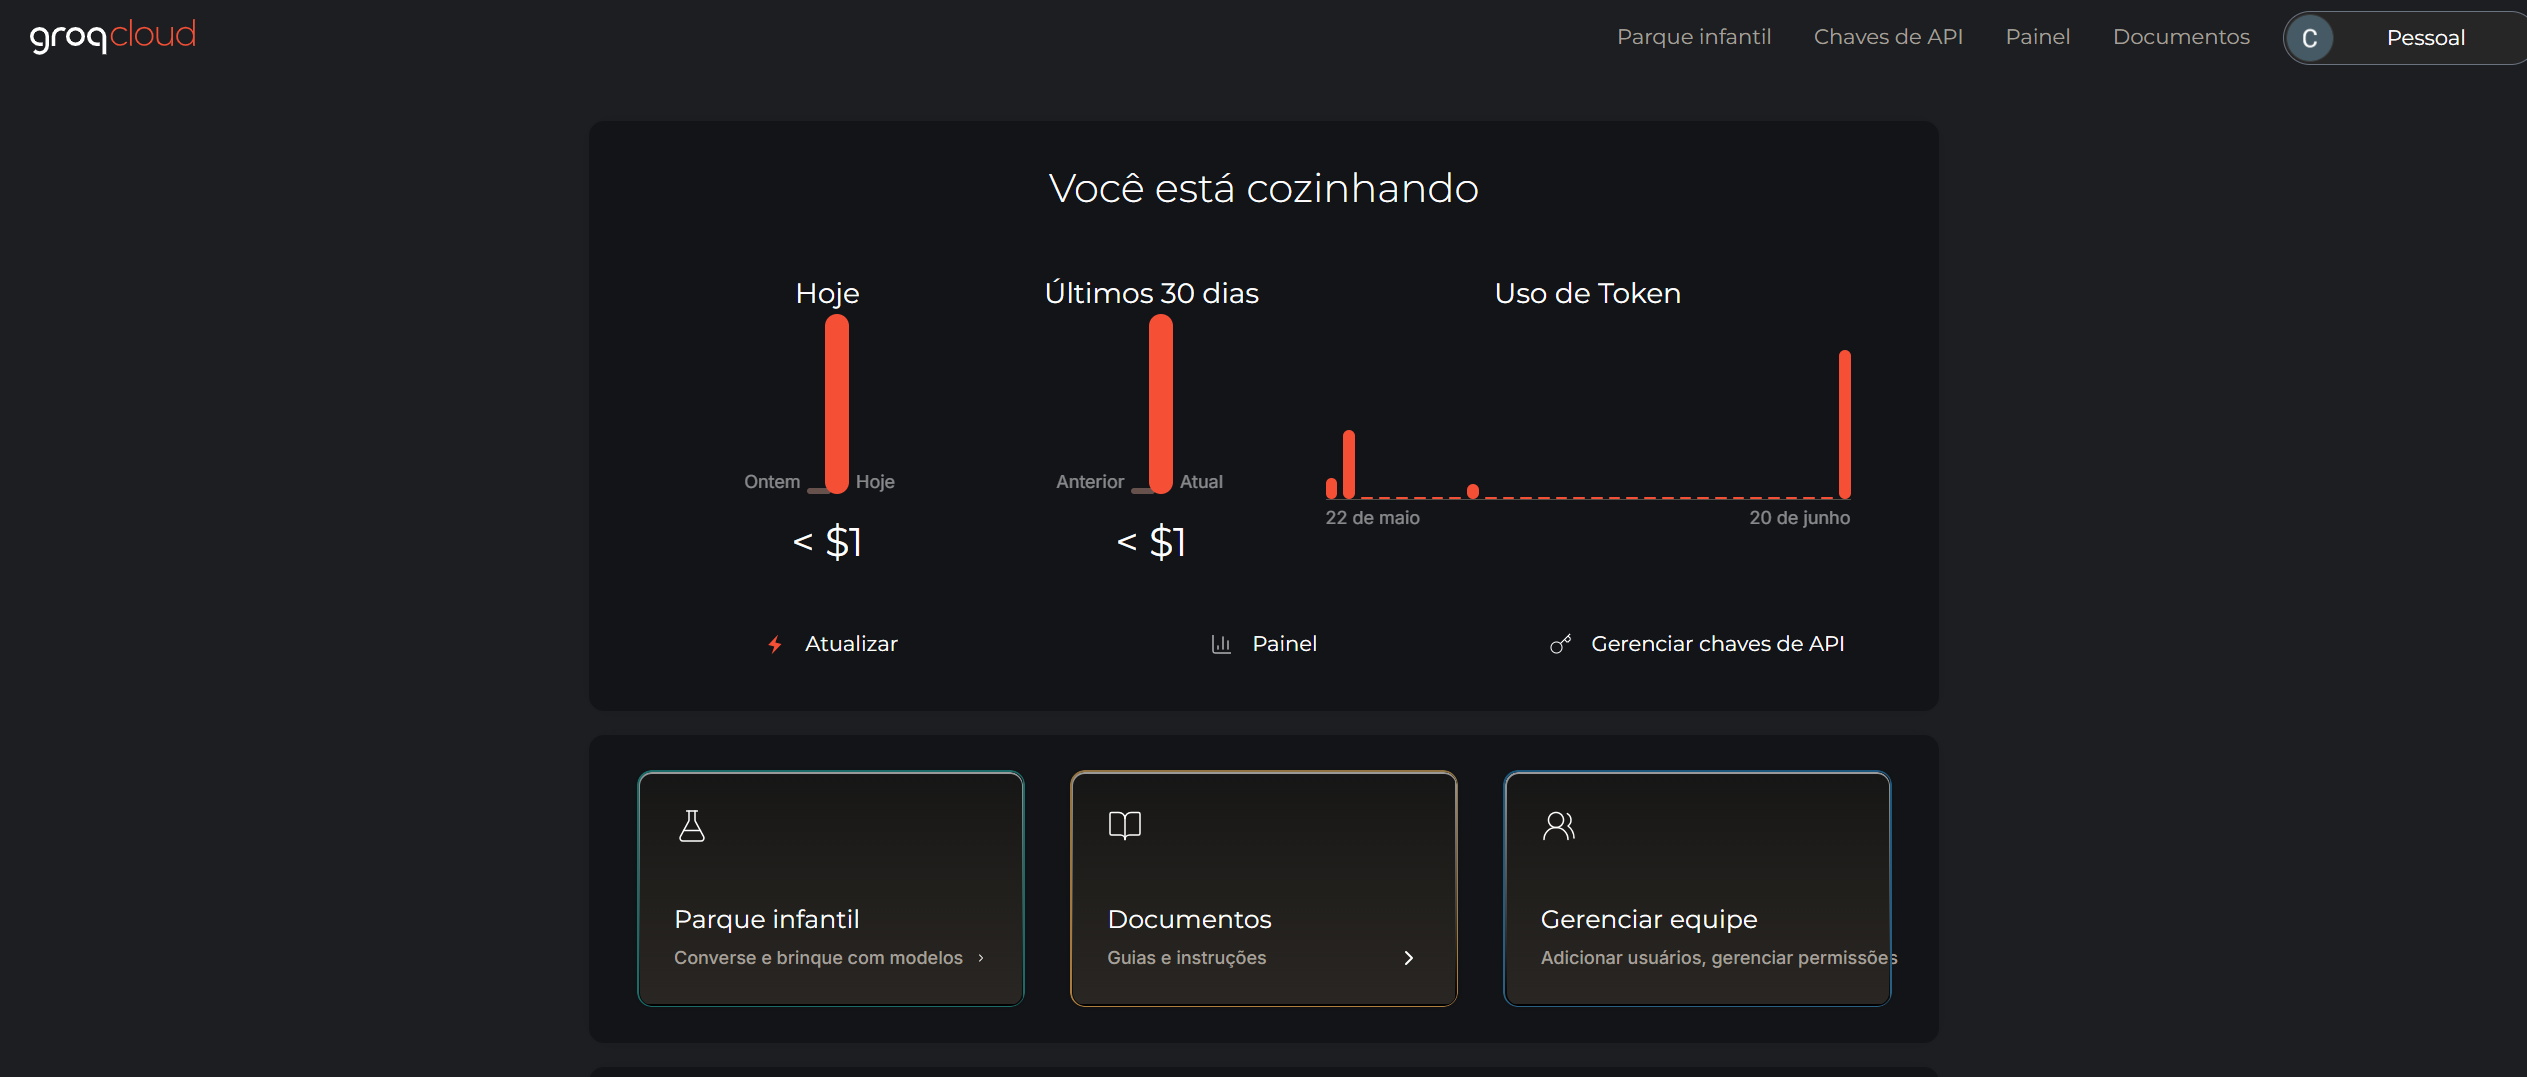

- O modelo usado foi: llama3-70b-8192

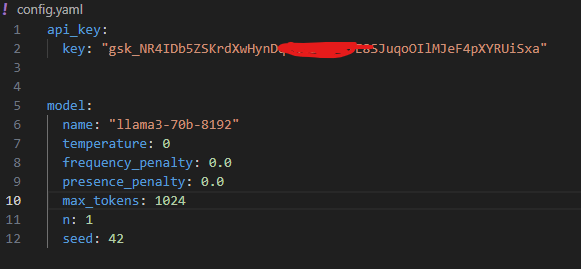

- O streamlit contem uma tela aonde podemos fazer perguntas no chat, ou usar perguntas pré-definidas.
- Temos como bando de dados uma RAG com 02 livros de anestesia para consulta, mas podemos add arquivos extras para consultas com dados extras.


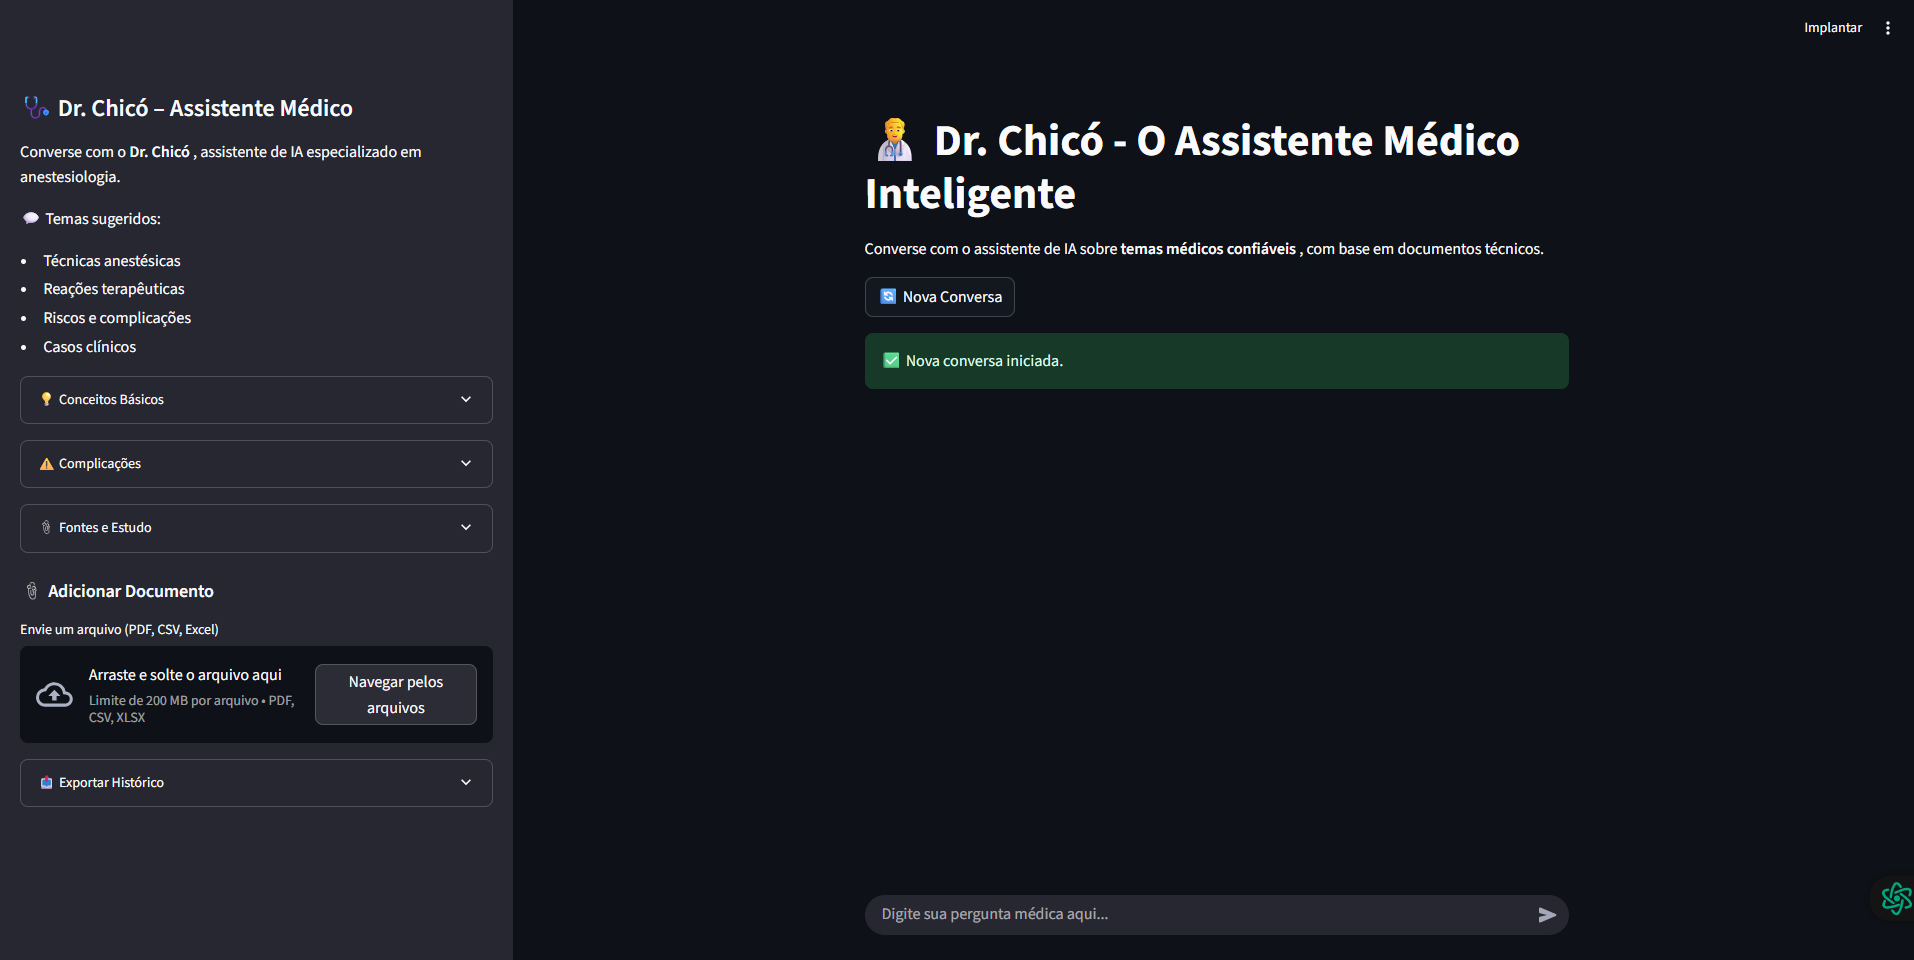

- Para rodar o mesmo, basta baixar o arquivo no GIT e rodar: streamlit run app.py